## **Preparando los datos**

Con algunas líneas de código, debemos ser capaces de dejar nuestros datos listos para el análisis

### **Limpiando datos**

Para ser útil para la mayoría de las tareas de analítica, los datos deben estar limpios. Esto significa que debe ser coherente, relevante y estandarizado. Para ello se recomienda
* Remover los outliers (datos atípicos);
* Remover valores inapropiados;
* Remover valores duplicados;
* Remover puntuación;
* Remover espacios en blanco;
* Estandarizar datos; y 
* Estandarizar texto.

### **Calculando y removiendo outliers**

Encontrar los valores atípicos le permite eliminar los valores que son tan altos o tan bajos que sesgan la vista general de los datos.

Vamos a considerar dos formas principales de detectar outliers:

### **1. Desviación Estándar**: 
Si los datos están normalmente distribuidos, entonces el 95% de los datos están dentro de 1.96 desviaciones estándar de la media. Entonces podemos eliminar los valores por encima o por debajo de ese rango.

### **2. Rango Intercuartílico ($IQR$, por sus siglas en inglés)**:
 El IQR es la diferencia entre el cuartíl $Q_1$ y el cuartíl $Q_3$, cualquier valor que esté por debajo de $Q_1 - 1.5IQR$ o mayor que $Q_3 + 1.5IQR$ son tratados como outliers y son removidos.






### **Método 1. Desviación Estándar**

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('local/data/gradedata.csv')
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [28]:
df.shape

(2000, 8)

In [3]:
meangrade = df['grade'].mean() #Calculamos la media de la columna 'grade'
stdgrade = df['grade'].std() #Calculamos la desviación estándar de la columna 'grade'
toprange = meangrade + 1.96*stdgrade #El máximo del rango intercuartílico
botrange = meangrade - 1.96*stdgrade #El míximo del rango intercuartílico
copydf = df #Se genera un nuevo DataFrame
copydf = copydf.drop(copydf[copydf['grade']> toprange].index) #Se eliminan los datos que cumplen la condición (oputliers por arriba)
copydf = copydf.drop(copydf[copydf['grade']< botrange].index)
copydf.shape #Se eliminan los datos que cumplen la condición (outliers por abajo)
copydf.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [4]:
copydf.shape

(1946, 8)

### **Metodo 2. Rango Intercuartílico**

In [5]:
q1 = df['grade'].quantile(.25)
q3 = df['grade'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copydf_q = df
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']>toprange_q].index)
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']<botrange_q].index)
copydf_q.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [31]:
copydf_q.shape

(1998, 8)

<AxesSubplot:xlabel='grade', ylabel='Count'>

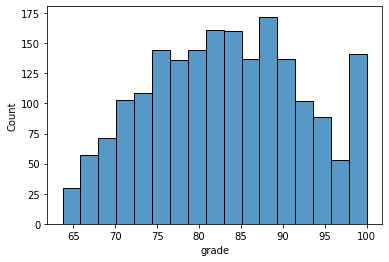

In [18]:
sns.histplot(x = copydf['grade'], data = copydf)


<AxesSubplot:xlabel='grade', ylabel='Count'>

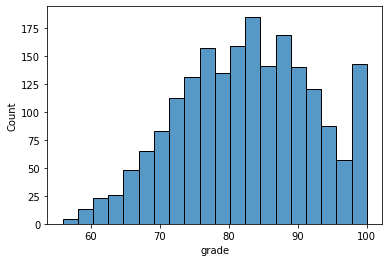

In [8]:
sns.histplot(x = copydf_q['grade'], data = copydf_q)

<AxesSubplot:xlabel='grade', ylabel='Count'>

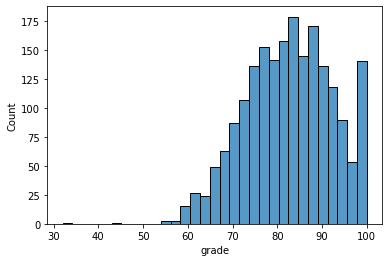

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(x = df['grade'], data= df)

## **Datos fltantes en DataFrames de Pandas**

Una de las cosas que más incomoda al trabajar con grandes volumenes de datos es encontrar el dato que falta. Puede hacer que sea imposible o impredecible de calcular la mayoría de las estadísticas agregadas o generar tablas dinámicas.

Pandas posee funciones que ayudan a hallar, borrar y cambiar los datos faltantes.

In [6]:
df1 = pd.read_csv('local/data/gradedatamissing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'local/data/gradedatamissing.csv'